### 交差点通過時間確認

制約（初期）
- 要求速度 ？km/h
- 上限加速度 1.0m/s^2
- ジャークリミット ±0.3m/s^3

x[m]進んだときの経過時間を算出

In [1]:
from IPython.display import Image, display_png
import matplotlib.pyplot as plt
import math
from ipywidgets import interact, FloatSlider

In [2]:
class Update1():
    def __init__(self, max_vel, max_acc, max_jerk):
        self.max_vel = max_vel
        self.max_acc = max_acc
        self.max_jerk = max_jerk
        self.min_jerk = -max_jerk
        self.t1 = self.max_acc / self.max_jerk
        max_acc_time = (self.max_vel - (0.5 * self.max_acc * self.max_acc / self.max_jerk) - (0.5 * self.max_acc * self.max_acc / abs(self.min_jerk))) / self.max_acc
        print("max_acc_time: %lf" % max_acc_time)
        self.t2 = self.t1 + max_acc_time
        self.t3 = self.t2 + (-self.max_acc / self.min_jerk)

    def update(self, x, v, a, t, dt):
        if t < self.t1:
            jerk = self.max_jerk
        elif t < self.t2:
            jerk = 0.0
        elif t < self.t3:
            jerk = self.min_jerk
        else:
            jerk = 0.0

        a = a + jerk * dt
        v = v + a * dt
        x = x + v * dt
        t = t + dt

        return x, v, a, jerk, t


class Update2():
    def __init__(self, max_vel, max_acc, max_jerk):
        self.max_vel = max_vel
        self.max_acc = max_acc
        self.max_jerk = max_jerk
        self.min_jerk = -max_jerk
        max_a = math.sqrt(self.max_vel * self.max_jerk)
        # print("max_a: %lf" % max_a)
        self.t1 = max_a / self.max_jerk
        self.t2 = 2 * self.t1

    def update(self, x, v, a, t, dt):
        if t < self.t1:
            jerk = self.max_jerk
        elif t < self.t2:
            jerk = self.min_jerk
        else:
            jerk = 0.0

        a = a + jerk * dt
        v = v + a * dt
        x = x + v * dt
        t = t + dt

        return x, v, a, jerk, t


In [3]:
@interact(distance=FloatSlider(min=0, max=50, step=1, value=10, continuous_update=False), # [m]
          vel_kmh=FloatSlider(min=0, max=20, step=1, value=5, continuous_update=False), # [km/h]
          max_acc=FloatSlider(min=0, max=2.0, step=0.1, value=1.0, continuous_update=False), # [m/s^2]
          max_jerk=FloatSlider(min=0, max=2.0, step=0.01, value=0.3, continuous_update=False), # [m/s^3]
          delay_time=FloatSlider(min=0, max=2.0, step=0.1, value=0.0, continuous_update=False) # [s]
         )
def crossing_time(distance, vel_kmh, max_acc, max_jerk, delay_time):

    dt = 0.01

    xs = []
    vels = []
    accs = []
    jerks = []
    ts = []

    # Initial condition
    x = 0.0  # [m]
    vel = 0.0  # [m/s]
    acc = 0.0  # [m/s^2]
    t = 0.0

    max_vel = vel_kmh * 1000.0 / 60.0 / 60.0
    max_a = math.sqrt(max_vel * max_jerk)
    print("max_a: %lf" % max_a)

    if max_a > max_acc:
        upd = Update1(max_vel, max_acc, max_jerk)
    else:
        upd = Update2(max_vel, max_acc, max_jerk)

    while x < distance:
        x, vel, acc, jerk, t = upd.update(x, vel, acc, t, dt)
        xs.append(x)
        vels.append(vel)
        accs.append(acc)
        jerks.append(jerk)
        ts.append(t)

    plt.figure(figsize=(40, 20))
    plt.subplot(2, 2, 1)
    plt.plot(ts, xs)
    plt.xlabel("Time [sec]")
    plt.ylabel("Distance [m]")
    plt.title("Crossing time max_jerk="+str(max_jerk))
    # print("jerk: %lf [m/s^3], max_vel: %lf [m/s], max_acc: %lf [m/s^2], delay: %lf [sec]" % (jerk, max_vel, max_acc, delay_time)  )
    print("(x, t) = (%lf, %lf)" % (x, t))

    plt.subplot(2, 2, 2)
    plt.plot(ts, vels)
    plt.xlabel("Time [sec]")
    plt.ylabel("Velocity [m/s]")
    plt.title("Velocity [m/s]")

    plt.subplot(2, 2, 3)
    plt.plot(ts, accs)
    plt.xlabel("Time [sec]")
    plt.ylabel("Acceleration [m/s^2]")
    plt.title("Acceleration [m/s^2]")

    plt.subplot(2, 2, 4)
    plt.plot(ts, jerks)
    plt.xlabel("Time [sec]")
    plt.ylabel("Jerk [m/s^3]")
    plt.title("Jerk [m/s^3]")


interactive(children=(FloatSlider(value=10.0, continuous_update=False, description='distance', max=50.0, step=…

## 参考

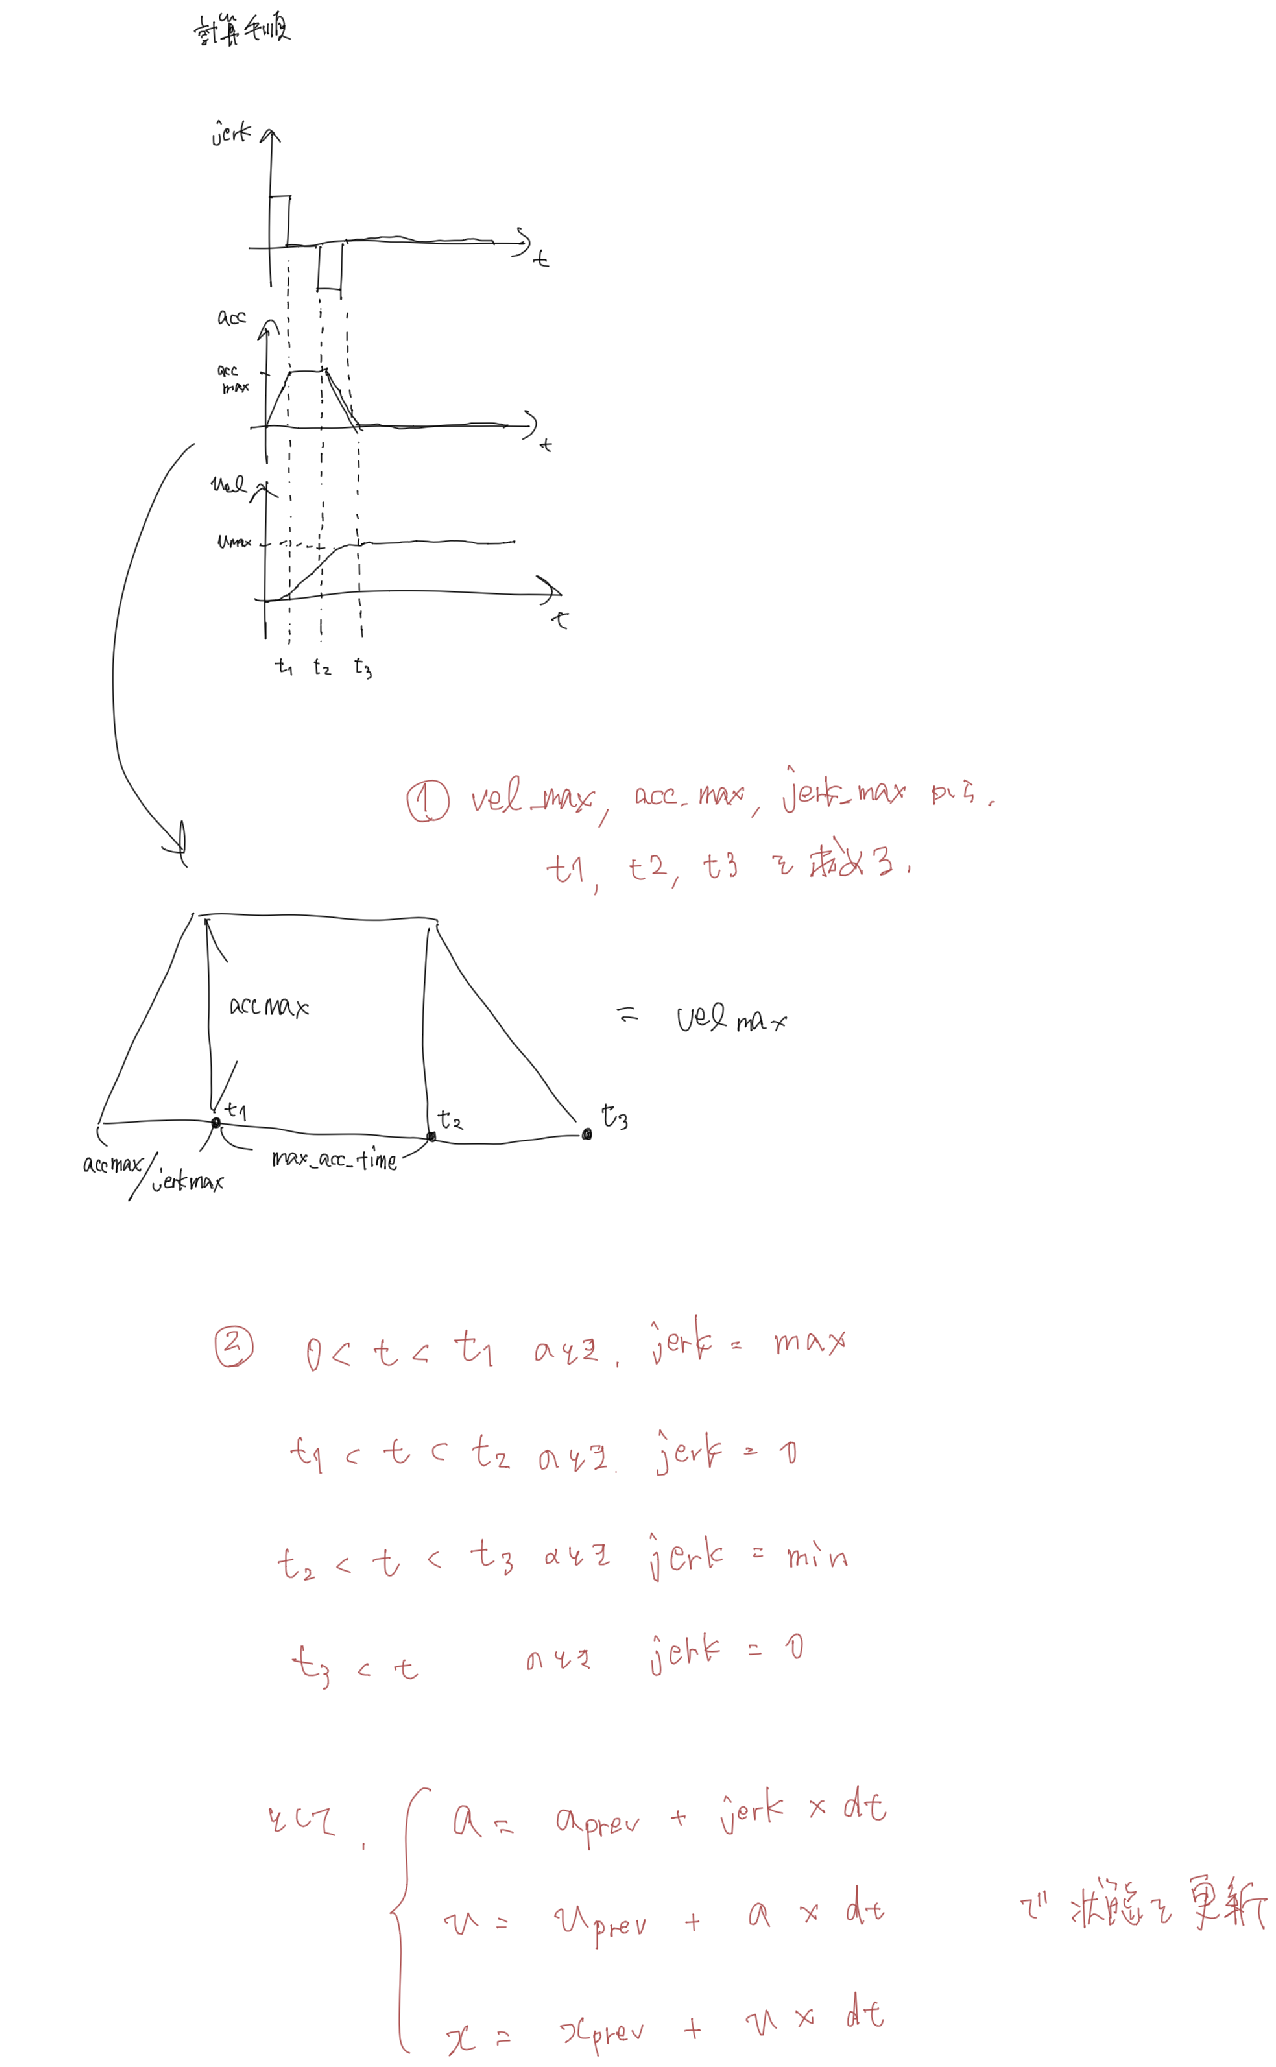

In [5]:
# png_file: str
display_png(Image("./calc_method.png"))